In [50]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

## Get housing data

In [64]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

X = torch.as_tensor(X, dtype = torch.float)
y = torch.as_tensor(y, dtype = torch.float)

## Split into train and test

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

## Create model

In [76]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.Linear(32, 64),
    nn.Linear(64, 128),
    nn.Linear(128, 64),
    nn.Linear(64, 32),
    nn.Linear(32, 1)
)

# Test architecture
model(X_train[0])

tensor([-14.4313], grad_fn=<ViewBackward0>)

## Criterion

In [77]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-6)

## Train

In [78]:
## Let's train the model
EPOCHS = 1000

train_losses = []
val_losses = []
for epoch in range(EPOCHS):

    # Make predictions
    y_pred = model(X_train).squeeze()

    # Compute losses
    loss = criterion(y_pred, y_train)

    # Reset gradients
    optimizer.zero_grad()

    # Backward pass to calculate gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    # Compute validation loss
    y_val_pred = model(X_val).squeeze()
    val_loss = criterion(y_val, y_val_pred)
    epoch_val_loss = val_loss.item() / len(X_val)

    # Store loss
    epoch_loss = loss.item() / len(X_train)

    print(f"Epoch {epoch+1}, train_loss: {epoch_loss:.6f}, val_loss: {epoch_val_loss:.6f}")

    train_losses.append(epoch_loss)
    val_losses.append(epoch_val_loss)

    
    


Epoch 1, train_loss: 0.063561, val_loss: 0.000379
Epoch 2, train_loss: 0.000175, val_loss: 0.000278
Epoch 3, train_loss: 0.000136, val_loss: 0.000277
Epoch 4, train_loss: 0.000136, val_loss: 0.000277
Epoch 5, train_loss: 0.000136, val_loss: 0.000277
Epoch 6, train_loss: 0.000136, val_loss: 0.000277
Epoch 7, train_loss: 0.000136, val_loss: 0.000276
Epoch 8, train_loss: 0.000136, val_loss: 0.000276
Epoch 9, train_loss: 0.000136, val_loss: 0.000276
Epoch 10, train_loss: 0.000136, val_loss: 0.000276
Epoch 11, train_loss: 0.000136, val_loss: 0.000276
Epoch 12, train_loss: 0.000136, val_loss: 0.000276
Epoch 13, train_loss: 0.000136, val_loss: 0.000276
Epoch 14, train_loss: 0.000136, val_loss: 0.000276
Epoch 15, train_loss: 0.000135, val_loss: 0.000276
Epoch 16, train_loss: 0.000135, val_loss: 0.000275
Epoch 17, train_loss: 0.000135, val_loss: 0.000275
Epoch 18, train_loss: 0.000135, val_loss: 0.000275
Epoch 19, train_loss: 0.000135, val_loss: 0.000275
Epoch 20, train_loss: 0.000135, val_loss

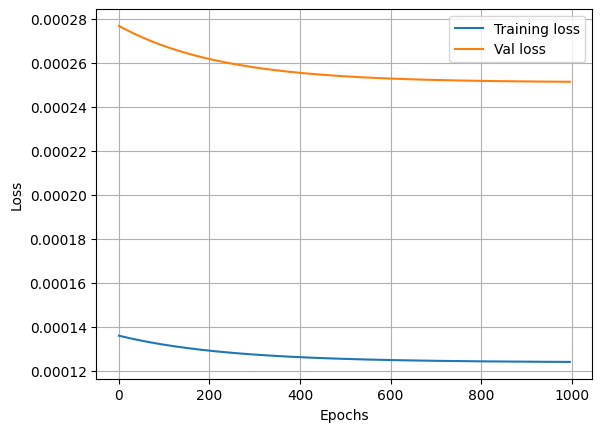

In [80]:
plt.figure()
plt.plot(train_losses[3:], label = 'Training loss')
plt.plot(val_losses[3:], label = 'Val loss')
plt.legend()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()